In [1]:
from huggingface_hub import hf_hub_download
import shutil
from pathlib import Path

DATASET_DIR = Path.cwd() / "dataset"
JSON_ANNOTATED_DIR = DATASET_DIR / "ResumesJsonAnnotated"
PDFS_DIR = DATASET_DIR / "ResumesPDF"

if DATASET_DIR.exists():
    print("Dataset already loaded")
else:
    DATASET_DIR.mkdir()
    annotated_zip = hf_hub_download(
        repo_id="Mehyaar/Annotated_NER_PDF_Resumes",
        repo_type="dataset",
        filename="ResumesJsonAnnotated.zip",
    )
    shutil.unpack_archive(annotated_zip, DATASET_DIR)
    print("Loaded json annotated resumes")
    pdfs_zip = hf_hub_download(
        repo_id="Mehyaar/Annotated_NER_PDF_Resumes",
        repo_type="dataset",
        filename="ResumesPDF.zip",
    )
    shutil.unpack_archive(pdfs_zip, DATASET_DIR)
    print("Loaded source pdfs")

Dataset already loaded


In [2]:
import json
import os

data = []
for filename in os.listdir(JSON_ANNOTATED_DIR):
    if filename.endswith(".json"):
        with open(os.path.join(JSON_ANNOTATED_DIR, filename), "r") as file:
            data.append(json.load(file))

first_cv = data[0]
text = first_cv["text"]
annotations = first_cv["annotations"]

print(f"Text: {text}")
print(f"Annotations: {annotations}")

Text: One97 Communications Limited 
Data Scientist Jan 2019 to Till Date 
Detect important information from images and redact
required fields. YOLO CNN Object-detection, OCR
Insights, find anomaly or performance drop in all
possible sub-space. 
Predict the Insurance claim probability. Estimate the
premium amount to be charged
B.Tech(Computer Science) from SGBAU university in
2017. 
M.Tech (Computer Science Engineering) from Indian
Institute of Technology (IIT), Kanpur in 2019WORK EXPERIENCE
EDUCATIONMACY WILLIAMS
DATA SCIENTIST
Data Scientist working  on problems related to market research and customer analysis. I want to expand my arsenal of
application building and work on different kinds of problems. Looking for a role where I can work with a coordinative team
and exchange knowledge during the process.
Java, C++, Python, Machine Learning, Algorithms, Natural Language Processing, Deep Learning, Computer Vision, Pattern
Recognition, Data Science, Data Analysis, Software Engineer, Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import numpy as np

def basic_dataset_info(data):
    print("=== BASIC DATASET OVERVIEW ===")
    print(f"Total number of CVs: {len(data)}")
    
    # Text length statistics
    text_lengths = [len(cv["text"]) for cv in data]
    annotation_counts = [len(cv["annotations"]) for cv in data]
    
    print(f"Average text length: {np.mean(text_lengths):.0f} characters")
    print(f"Average annotations per CV: {np.mean(annotation_counts):.1f}")
    print(f"Min text length: {min(text_lengths)}")
    print(f"Max text length: {max(text_lengths)}")
    print(f"Min annotations: {min(annotation_counts)}")
    print(f"Max annotations: {max(annotation_counts)}")
    
    return text_lengths, annotation_counts

text_lengths, annotation_counts = basic_dataset_info(data)

=== BASIC DATASET OVERVIEW ===
Total number of CVs: 5029
Average text length: 4441 characters
Average annotations per CV: 107.1
Min text length: 0
Max text length: 99973
Min annotations: 0
Max annotations: 591


In [5]:
# 2. Annotation Type Analysis
def analyze_annotation_types(data):
    print("\n=== ANNOTATION TYPE ANALYSIS ===")
    
    all_annotations = []
    for cv in data:
        all_annotations.extend(cv["annotations"])
    
    # Extract annotation types
    annotation_types = []
    for ann in all_annotations:
        if len(ann) >= 3:
            # Extract the type (e.g., 'SKILL' from 'SKILL: python')
            ann_type = ann[2].split(':')[0] if ':' in ann[2] else ann[2]
            annotation_types.append(ann_type)
    
    type_counts = Counter(annotation_types)
    
    print("Annotation types and their frequencies:")
    for ann_type, count in type_counts.most_common():
        print(f"  {ann_type}: {count} ({count/len(all_annotations)*100:.1f}%)")
    
    return all_annotations, annotation_types, type_counts

all_annotations, annotation_types, type_counts = analyze_annotation_types(data)


=== ANNOTATION TYPE ANALYSIS ===
Annotation types and their frequencies:
  SKILL: 538482 (100.0%)


In [15]:
# 3. Skills Analysis (Most common skills)
def analyze_skills(data):
    print("\n=== SKILLS ANALYSIS ===")
    
    skills = []
    skill_patterns = []
    
    for cv in data:
        for ann in cv["annotations"]:
            if len(ann) >= 3 and 'SKILL' in ann[2]:
                # Extract the actual skill name
                skill_full = ann[2]
                skill_name = skill_full.split(': ')[1] if ': ' in skill_full else skill_full
                skills.append(skill_name.lower().strip())
                if(skill_name.lower().strip() == 'com'):
                    print(skill_name, skill_full)
                # Also get the text snippet
                start, end = ann[0], ann[1]
                skill_text = cv["text"][start:end]
                skill_patterns.append(skill_text)
    
    skill_counts = Counter(skills)
    skill_pattern_counts = Counter(skill_patterns)
    
    print("Top 20 most frequent skills:")
    for skill, count in skill_counts.most_common(20):
        print(f"  {skill}: {count}")
    
    return skills, skill_counts, skill_patterns, skill_pattern_counts

skills, skill_counts, skill_patterns, skill_pattern_counts = analyze_skills(data)


=== SKILLS ANALYSIS ===
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM
COM SKILL: COM


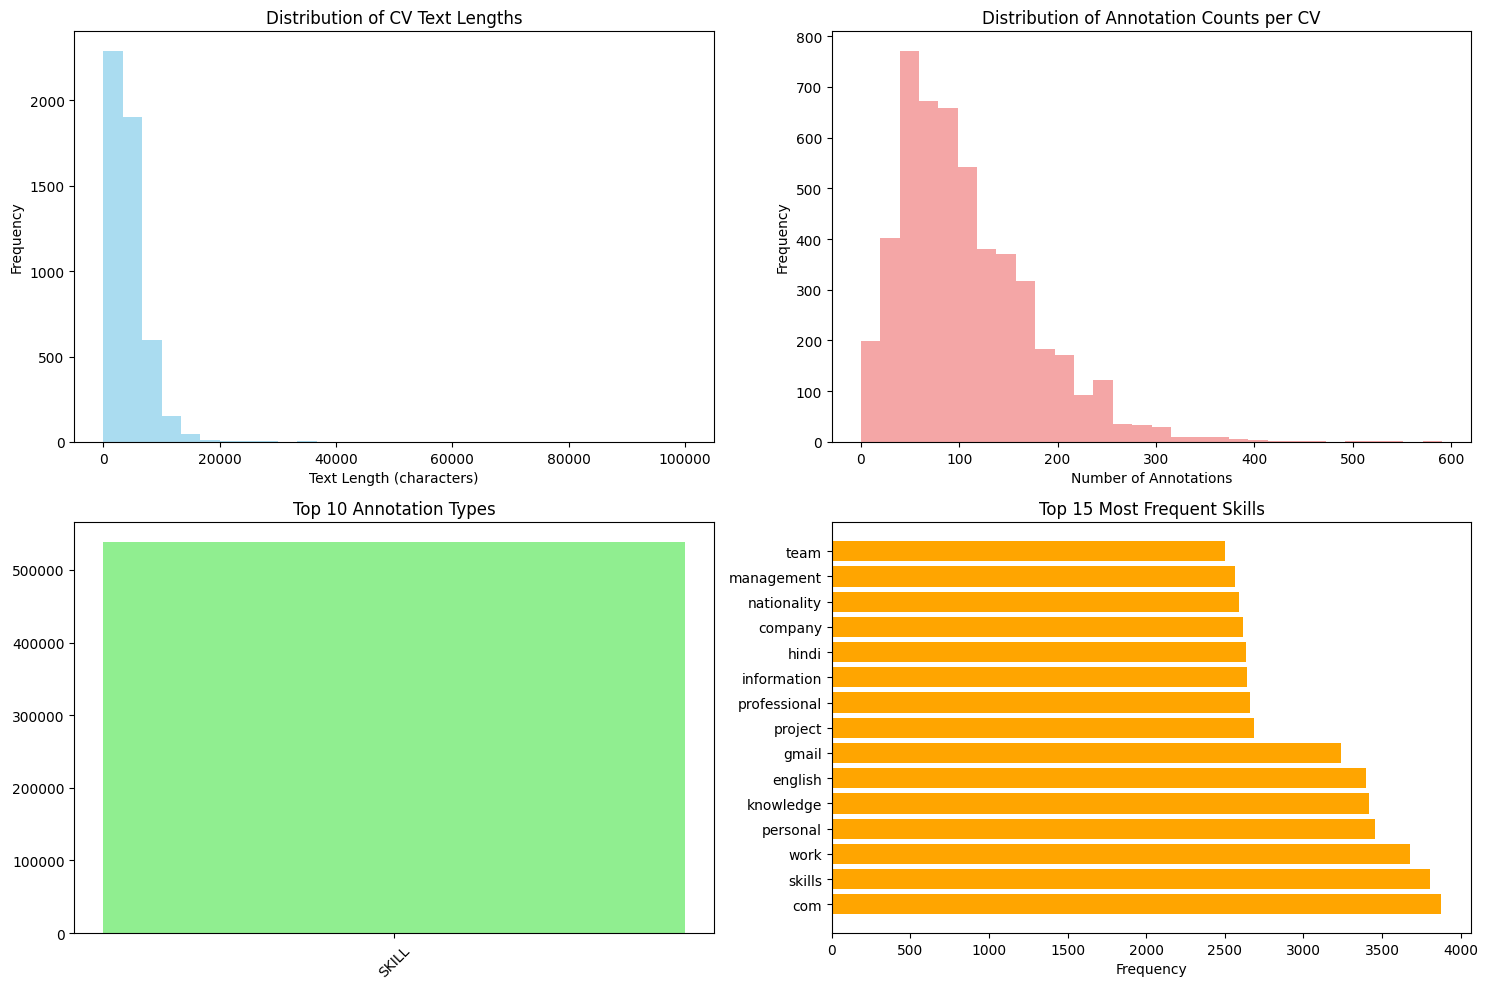

In [7]:
# 4. Visualization: Text Length and Annotation Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length distribution
axes[0,0].hist(text_lengths, bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of CV Text Lengths')
axes[0,0].set_xlabel('Text Length (characters)')
axes[0,0].set_ylabel('Frequency')

# Annotation count distribution
axes[0,1].hist(annotation_counts, bins=30, alpha=0.7, color='lightcoral')
axes[0,1].set_title('Distribution of Annotation Counts per CV')
axes[0,1].set_xlabel('Number of Annotations')
axes[0,1].set_ylabel('Frequency')

# Annotation types
if type_counts:
    types, counts = zip(*type_counts.most_common(10))
    axes[1,0].bar(types, counts, color='lightgreen')
    axes[1,0].set_title('Top 10 Annotation Types')
    axes[1,0].tick_params(axis='x', rotation=45)

# Top skills
if skill_counts:
    top_skills, skill_counts_vals = zip(*skill_counts.most_common(15))
    axes[1,1].barh(top_skills, skill_counts_vals, color='orange')
    axes[1,1].set_title('Top 15 Most Frequent Skills')
    axes[1,1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

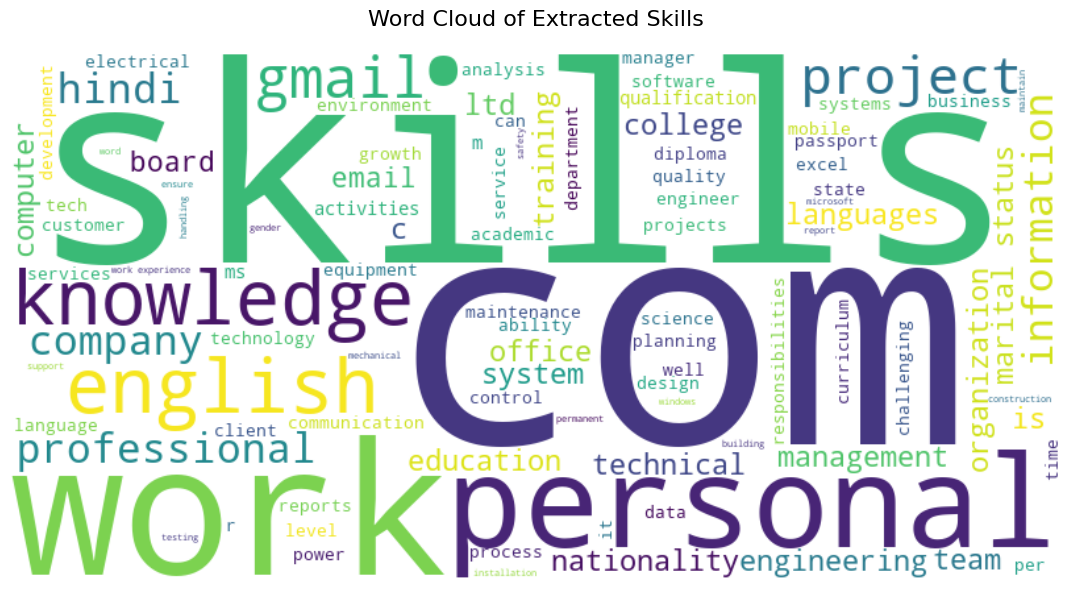

In [8]:
# 5. Word Cloud of Skills
def create_skills_wordcloud(skill_counts):
    if skill_counts:
        # Create word cloud from skills
        wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='white',
            colormap='viridis',
            max_words=100
        ).generate_from_frequencies(skill_counts)
        
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Extracted Skills', fontsize=16, pad=20)
        plt.tight_layout()
        plt.show()

create_skills_wordcloud(skill_counts)

In [9]:
# 6. Annotation Position Analysis
def analyze_annotation_positions(data):
    print("\n=== ANNOTATION POSITION ANALYSIS ===")
    
    relative_positions = []
    annotation_lengths = []
    
    for cv in data:
        text_length = len(cv["text"])
        for ann in cv["annotations"]:
            if len(ann) >= 3:
                start, end = ann[0], ann[1]
                # Calculate relative position in text
                rel_pos = start / text_length
                relative_positions.append(rel_pos)
                annotation_lengths.append(end - start)
    
    print(f"Average annotation length: {np.mean(annotation_lengths):.1f} characters")
    print(f"Average relative position: {np.mean(relative_positions):.3f}")
    
    return relative_positions, annotation_lengths

relative_positions, annotation_lengths = analyze_annotation_positions(data)


=== ANNOTATION POSITION ANALYSIS ===
Average annotation length: 9.1 characters
Average relative position: 0.433


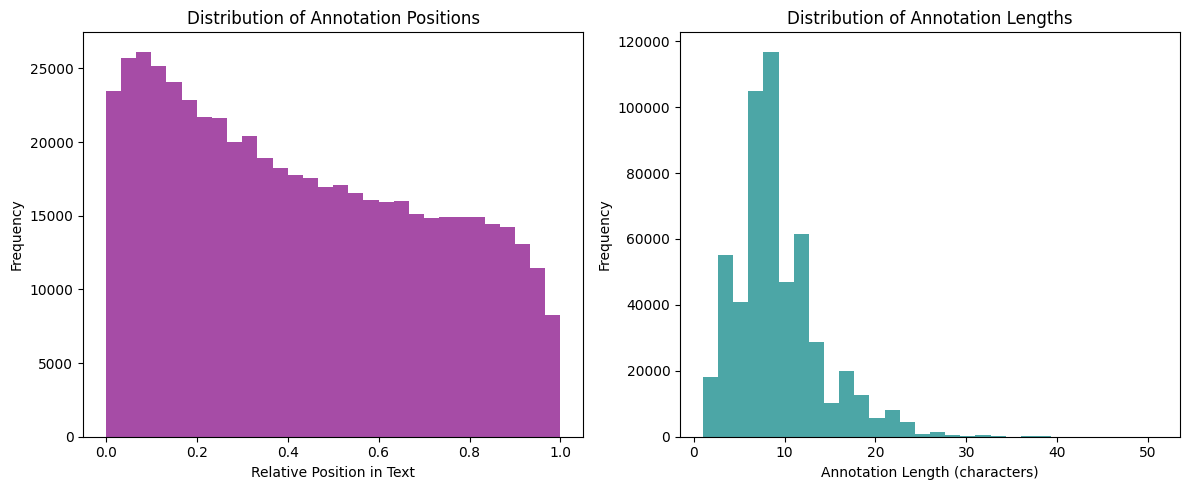

In [10]:
# 7. Visualization: Annotation Positions and Lengths
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Relative positions
axes[0].hist(relative_positions, bins=30, alpha=0.7, color='purple')
axes[0].set_title('Distribution of Annotation Positions')
axes[0].set_xlabel('Relative Position in Text')
axes[0].set_ylabel('Frequency')

# Annotation lengths
axes[1].hist(annotation_lengths, bins=30, alpha=0.7, color='teal')
axes[1].set_title('Distribution of Annotation Lengths')
axes[1].set_xlabel('Annotation Length (characters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# 8. CV Content Analysis
def analyze_cv_content(data):
    print("\n=== CV CONTENT ANALYSIS ===")
    
    # Common sections in CVs
    sections = ['education', 'experience', 'skills', 'projects', 'summary', 'contact']
    section_occurrences = {section: 0 for section in sections}
    
    education_keywords = ['university', 'college', 'degree', 'b.tech', 'm.tech', 'bachelor', 'master']
    experience_keywords = ['experience', 'worked', 'employed', 'job', 'position']
    skill_keywords = ['skills', 'technologies', 'programming', 'languages']
    
    for cv in data:
        text_lower = cv["text"].lower()
        
        for section in sections:
            if section in text_lower:
                section_occurrences[section] += 1
        
        # Check for education
        if any(keyword in text_lower for keyword in education_keywords):
            section_occurrences['education'] += 1
        
        # Check for experience
        if any(keyword in text_lower for keyword in experience_keywords):
            section_occurrences['experience'] += 1
    
    print("Section occurrences across CVs:")
    for section, count in section_occurrences.items():
        percentage = (count / len(data)) * 100
        print(f"  {section.title()}: {count} ({percentage:.1f}%)")
    
    return section_occurrences

section_occurrences = analyze_cv_content(data)


=== CV CONTENT ANALYSIS ===
Section occurrences across CVs:
  Education: 7558 (150.3%)
  Experience: 8661 (172.2%)
  Skills: 3879 (77.1%)
  Projects: 1834 (36.5%)
  Summary: 1230 (24.5%)
  Contact: 1474 (29.3%)


In [12]:
# 9. Interactive Visualization with Plotly
# Skills treemap
if skill_counts:
    skills_df = pd.DataFrame({
        'skill': list(skill_counts.keys()),
        'count': list(skill_counts.values())
    }).sort_values('count', ascending=False).head(50)
    
    fig = px.treemap(skills_df, 
                     path=['skill'], 
                     values='count',
                     title='Skills Distribution Treemap (Top 50)',
                     color='count',
                     color_continuous_scale='Blues')
    fig.show()

In [13]:
# 10. Quality Metrics Analysis
def calculate_quality_metrics(data):
    print("\n=== DATA QUALITY METRICS ===")
    
    metrics = {
        'cv_with_annotations': 0,
        'avg_annotations_per_cv': 0,
        'annotation_density': [],
        'overlapping_annotations': 0
    }
    
    total_annotations = 0
    total_text_length = 0
    
    for cv in data:
        text_length = len(cv["text"])
        ann_count = len(cv["annotations"])
        
        total_annotations += ann_count
        total_text_length += text_length
        
        if ann_count > 0:
            metrics['cv_with_annotations'] += 1
        
        # Annotation density (annotations per 1000 characters)
        density = (ann_count / text_length) * 1000 if text_length > 0 else 0
        metrics['annotation_density'].append(density)
    
    metrics['avg_annotations_per_cv'] = total_annotations / len(data)
    avg_density = np.mean(metrics['annotation_density'])
    
    print(f"CVs with annotations: {metrics['cv_with_annotations']}/{len(data)}")
    print(f"Average annotations per CV: {metrics['avg_annotations_per_cv']:.1f}")
    print(f"Average annotation density: {avg_density:.2f} per 1000 chars")
    
    return metrics

quality_metrics = calculate_quality_metrics(data)


=== DATA QUALITY METRICS ===
CVs with annotations: 4971/5029
Average annotations per CV: 107.1
Average annotation density: 26.78 per 1000 chars
